Detected remote with confidence 0.994 at location [46.96, 72.61, 181.02, 119.73]
Detected remote with confidence 0.975 at location [340.66, 79.19, 372.59, 192.65]
Detected cat with confidence 0.984 at location [12.27, 54.25, 319.42, 470.99]
Detected remote with confidence 0.922 at location [41.66, 71.96, 178.7, 120.33]
Detected cat with confidence 0.914 at location [342.34, 21.48, 638.64, 372.46]


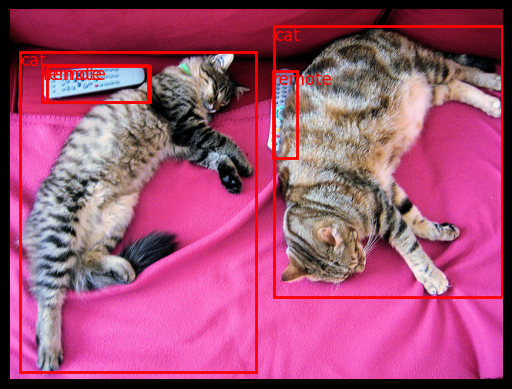

In [3]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch
import requests
import matplotlib.pyplot as plt

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes

# print results
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

# Plot the image with bounding boxes
plt.imshow(image)
ax = plt.gca()

for box, label in zip(results["boxes"], results["labels"]):
    box = box.tolist()
    label = label.item()
    ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color='r', linewidth=2))
    plt.text(box[0], box[1], model.config.id2label[label], color='r', fontsize=12, verticalalignment='top')

plt.axis('off')
plt.show()
